In [1]:
import requests
import pandas as pd

In [2]:
from bs4 import BeautifulSoup

In [3]:
import numpy as np

In [4]:
import time

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default') 
plt.rcParams['figure.figsize'] = (15, 5)

#Scrapers Galore.

The objective of this project is to create a database of all available Github repositories explicitly devoted to the development or implementation of web scrapers.

This notebook is divided into five sections, each of them presents a step-by-step walkthrough of how the database was built and analyzed. 

**Section 1:** how the data was requested from Github's API

**Section 2:** the process of cleaning the database

**Section 3:** descriptive statistics

**Section 4:** Classifier Algorithms applied to README docs

**Section 5:** Clustering algorithms

**Please see <a href: http://ledealgorithms.tumblr.com/post/127877324429/scrapers-on-github-2008-2015> my post on this project </a> for a detailed analysis of the results**

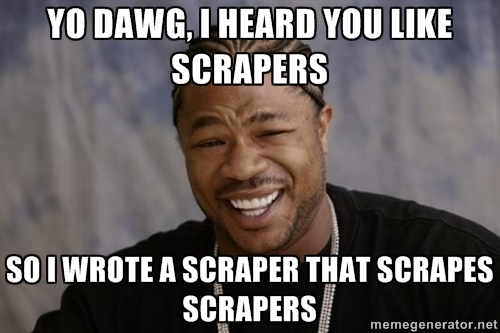

In [28]:
from IPython.display import Image
Image(filename='xzibit.jpg')

##Section 1: Working with Github's API

GitHub's API is a very thorough archive of repositories, users and code. Authorized applications can make 30 requests per minute and a search of GitHub's repositories returns json document with a list of up to 1000 elements. However, the total amount of results from any given query may be over 1000. Therefore, for queries with 1k+ results it is necessary to make several ordered requests.

I used the date of creation to segment my query. This process involved a great deal of trial and error since I didn't know how many scrapers were build for any particular interval of time.

The key words for every request were 'scrape OR scraper OR scraping'. The API looked for matches in the title, description and README file of every repository between 2008 and present day. The final database has **N= 17366**

In [4]:
#scrapers up to Jan 1 2011 inclusive
scrapers_to2011 = []
for i in range(1,7):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:%3C=2011-01-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to2011.append(item)
    

In [5]:
len(scrapers_to2011)

565

In [10]:
#2011-01-01..2012-01-01 non inclusive
scrapers_to2012 = []
for i in range(1,9):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2011-01-01..2012-01-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to2012.append(item)
    

In [11]:
len(scrapers_to2012)

756

In [14]:
#2011-12-31..2012-07-01 non inclusive
scrapers_to072012 = []
for i in range(1,8):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2011-12-31..2012-07-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to072012.append(item)
len(scrapers_to072012)

633

In [15]:
#2012-06-30..2013-01-01 non inclusive
scrapers_to2013 = []
for i in range(1,11):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2012-06-30..2013-01-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to2013.append(item)
len(scrapers_to2013)

915

In [17]:
#2012-12-31..2013-05-01 non inclusive
scrapers_to0513 = []
for i in range(1,10):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2012-12-31..2013-05-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0513.append(item)
len(scrapers_to0513)

875

In [19]:
#2013-04-30..2013-08-01 non inclusive
scrapers_to0813 = []
for i in range(1,9):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2013-04-30..2013-08-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0813.append(item)
len(scrapers_to0813)

775

In [20]:
#2013-07-31..2013-11-01 non inclusive
scrapers_to1113 = []
for i in range(1,10):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2013-07-31..2013-11-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to1113.append(item)
len(scrapers_to1113)

861

In [21]:
# 2013-10-31..2014-02-01 nopn inclusive
scrapers_to0214 = []
for i in range(1,11):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2013-10-31..2014-02-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0214.append(item)
len(scrapers_to0214)

990

In [22]:
# 2014-01-31..2014-04-01 non inclusive
scrapers_to0414 = []
for i in range(1,10):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2014-01-31..2014-04-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0414.append(item)
len(scrapers_to0414)

883

In [23]:
#2014-03-31..2014-06-01 non inclusive
scrapers_to0614 = []
for i in range(1,10):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2014-03-31..2014-06-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0614.append(item)
len(scrapers_to0614)

884

In [24]:
#2014-05-31..2014-08-01 non inclusive
scrapers_to0814 = []
for i in range(1,11):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2014-05-31..2014-08-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0814.append(item)
len(scrapers_to0814)

907

In [25]:
#2014-07-31..2014-10-01 non inclusive
scrapers_to1014 = []
for i in range(1,11):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2014-07-31..2014-10-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to1014.append(item)
len(scrapers_to1014)

933

In [29]:
#2014-09-30..2014-11-01 non inclusive
scrapers_to1114 = []
for i in range(1,10):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2014-09-30..2014-11-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to1114.append(item)
len(scrapers_to1114)

697

In [30]:
#2014-10-31..2014-12-20 non inclusive
scrapers_to1214 = []
for i in range(1,10):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2014-10-31..2014-12-20&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to1214.append(item)
len(scrapers_to1214)

853

In [31]:
#2014-12-19..2015-02-01 non inclusive
scrapers_to0215 = []
for i in range(1,10):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2014-12-19..2015-02-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0215.append(item)
len(scrapers_to0215)

869

In [32]:
#2015-01-31..2015-03-01 non inclusive
scrapers_to0315 = []
for i in range(1,9):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2015-01-31..2015-03-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0315.append(item)
len(scrapers_to0315)

703

In [33]:
#2015-02-28..2015-04-01 non inclusive
scrapers_to0415 = []
for i in range(1,9):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2015-02-28..2015-04-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0415.append(item)
len(scrapers_to0415)

736

In [34]:
#2015-03-31..2015-05-01 non inclusive
scrapers_to0515 = []
for i in range(1,9):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2015-03-31..2015-05-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0515.append(item)
len(scrapers_to0515)

706

In [35]:
#2015-04-30..2015-06-01 non inclusive
scrapers_to0615 = []
for i in range(1,9):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2015-04-30..2015-06-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0615.append(item)
len(scrapers_to0615)

759

In [36]:
#2015-05-31..2015-07-01 non inclusive
scrapers_to0715 = []
for i in range(1,9):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2015-05-31..2015-07-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0715.append(item)
len(scrapers_to0715)

727

In [37]:
#2015-06-30..2015-08-01 non inclusive
scrapers_to0815 = []
for i in range(1,10):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2015-06-30..2015-08-01&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_to0815.append(item)
len(scrapers_to0815)

801

In [38]:
#2015-07-31.. today inclusive
scrapers_totoday = []
for i in range(1,7):
    url = "https://api.github.com/search/repositories?q=scrape+OR+scraping+OR+scraper+created:2015-07-31..2015-08-21&order=asc&per_page=100&page="+str(i)+"&client_id=0fd964b95259ab80e38&client_secret=0fd964b95259ab80e38"
    req = requests.get(url).json()['items']
    for item in req:
        scrapers_totoday.append(item)
len(scrapers_totoday)

538

In [39]:
all_scrapers = scrapers_to0214+scrapers_to0215+scrapers_to0315+scrapers_to0414+scrapers_to0415+scrapers_to0513+scrapers_to0515+scrapers_to0614+scrapers_to0615+scrapers_to0715+scrapers_to072012+scrapers_to0813+scrapers_to0814+scrapers_to0815+scrapers_to1014+scrapers_to1113+scrapers_to1114+scrapers_to1214+scrapers_to2011+scrapers_to2012+scrapers_to2013+scrapers_totoday

In [42]:
df_all_scrapers = pd.DataFrame(all_scrapers)

In [95]:
df.to_excel("all_scrapers.xls")

NameError: name 'df' is not defined

##Section 2: Cleaning the Database

**`df`** is a selection of the original database that includes only the variables that I'm interested in analyzing.

In [48]:
df_all_scrapers.columns

Index([      u'archive_url',     u'assignees_url',         u'blobs_url',
            u'branches_url',         u'clone_url', u'collaborators_url',
            u'comments_url',       u'commits_url',       u'compare_url',
            u'contents_url',  u'contributors_url',        u'created_at',
          u'default_branch',       u'description',     u'downloads_url',
              u'events_url',              u'fork',             u'forks',
             u'forks_count',         u'forks_url',         u'full_name',
         u'git_commits_url',      u'git_refs_url',      u'git_tags_url',
                 u'git_url',     u'has_downloads',        u'has_issues',
               u'has_pages',          u'has_wiki',          u'homepage',
               u'hooks_url',          u'html_url',                u'id',
       u'issue_comment_url',  u'issue_events_url',        u'issues_url',
                u'keys_url',        u'labels_url',          u'language',
           u'languages_url',        u'merges_url', 

In [60]:
df = df_all_scrapers[['name','description','html_url','forks_count','stargazers_count','watchers_count','updated_at','created_at','size','open_issues_count','has_downloads','score','language','full_name']]

In [225]:
df.drop('readme', axis=1, inplace=True) #I screwed up my first try at dowloading all the readme files

/Users/sebastianmunoznajar/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [322]:
df.head(5)

,name,description,html_url,forks_count,stargazers_count,watchers_count,updated_at,created_at,size,open_issues_count,has_downloads,score,language,full_name,created_ym,score_round
0,scraper,Scrapes sites. Gets news. Eventually events.,https://github.com/openeventdata/scraper,22,21,21,2015-08-07T12:29:22Z,2014-01-26T01:18:53Z,520,2,True,46.280060,Python,openeventdata/scraper,2014-01,46.28
1,GoogleScraper,A Python module to scrape several search engin...,https://github.com/NikolaiT/GoogleScraper,161,620,620,2015-08-17T11:59:36Z,2013-12-06T15:34:20Z,17215,52,True,35.007828,HTML,NikolaiT/GoogleScraper,2013-12,35.01
2,scraper,A simple API for phantom web scraping,https://github.com/ivolo/scraper,2,7,7,2015-01-27T19:46:35Z,2014-01-12T02:18:44Z,166,4,True,25.522753,JavaScript,ivolo/scraper,2014-01,25.52
3,Amazon-Scraper,Amazon Price scraping tool,https://github.com/cleure/Amazon-Scraper,4,11,11,2015-07-19T10:03:53Z,2013-11-04T23:52:37Z,356,0,True,19.099678,Python,cleure/Amazon-Scraper,2013-11,19.10
4,scraper,"Scraper example built on Scala, Akka and Jsoup",https://github.com/sap1ens/scraper,5,9,9,2015-07-19T04:38:06Z,2013-10-31T04:11:07Z,185,0,True,19.032696,Scala,sap1ens/scraper,2013-10,19.03
5,form-scraper,A JS module that helps with Form scraping and ...,https://github.com/tounano/form-scraper,6,8,8,2015-08-18T08:18:43Z,2013-12-20T15:28:11Z,190,1,True,19.018940,JavaScript,tounano/form-scraper,2013-12,19.02
6,scrape-the-gibson,Code snippets for a workshop on web scraping.,https://github.com/abelsonlive/scrape-the-gibson,9,22,22,2015-07-11T07:53:06Z,2013-12-04T15:21:51Z,180,0,True,12.688292,Python,abelsonlive/scrape-the-gibson,2013-12,12.69
7,trackback_scraper,,https://github.com/Genius/trackback_scraper,12,118,118,2015-07-16T14:20:18Z,2013-12-30T16:57:18Z,141,0,True,12.162844,Ruby,Genius/trackback_scraper,2013-12,12.16
8,web-scraper-chrome-extension,Web data extraction tool implemented as chrome...,https://github.com/martinsbalodis/web-scraper-...,63,205,205,2015-08-20T00:13:09Z,2013-11-23T19:14:29Z,2322,57,True,12.162844,JavaScript,martinsbalodis/web-scraper-chrome-extension,2013-11,12.16
9,social_scrapers,Various Python scripts to scrape sites that st...,https://github.com/iandees/social_scrapers,3,20,20,2015-07-21T19:15:58Z,2014-01-06T17:29:39Z,136,0,True,11.823298,Python,iandees/social_scrapers,2014-01,11.82


###2.1 Cleaning dates

In [223]:
df['created_ym'] = df['created_at'].apply(lambda x: x[0:7])
df['created_ym'].describe()

/Users/sebastianmunoznajar/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count       17366
unique         89
top       2015-07
freq          815
Name: created_ym, dtype: object

In [321]:
df['score_round'] = df['score'].apply(lambda x: round(x, 2))
df['score_round'].describe()

/Users/sebastianmunoznajar/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count    17366.000000
mean         2.196999
std          2.243177
min          0.100000
25%          0.900000
50%          1.770000
75%          2.480000
max         74.710000
Name: score_round, dtype: float64

###2.2 Getting the README docs
I'll make a second database with the name of the scrapers the text of their README.

In [123]:
readme = []
count = 0
for url in df.loc[:, 'html_url']:
    if url:
        a = BeautifulSoup(requests.get(url).text, 
              'html.parser').findAll('article', 
                                     attrs={'class':'markdown-body entry-content'})
    if len(a) != 0:
        readme.append(a[0].text)
    else:
        readme.append('None')
    count += 1
    if count >= 10 and count % 10 == 0:
        print count,

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 222

ConnectionError: ('Connection aborted.', gaierror(8, 'nodename nor servname provided, or not known'))

In [127]:
readme1 = []
count = 0
for url in df.loc[(len(readme)-1):, 'html_url']:
    if url:
        a = BeautifulSoup(requests.get(url).text, 
              'html.parser').findAll('article', 
                                     attrs={'class':'markdown-body entry-content'})
    if len(a) != 0:
        readme1.append(a[0].text)
    else:
        readme1.append('None')
    count += 1
    if count >= 10 and count % 10 == 0:
        print count,

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550

ConnectionError: ('Connection aborted.', error(60, 'Operation timed out'))

**I keep timing out!** after compiling the files I've gotten this far and making sure they don't overlap I'll run a new for loop with two second sleep time between iterations.

In [137]:
readme1 = []
count = 0
for url in df.loc[(len(readme)-1):, 'html_url']:
    time.sleep(2)
    if url:
        a = BeautifulSoup(requests.get(url).text, 
              'html.parser').findAll('article', 
                                     attrs={'class':'markdown-body entry-content'})
    if len(a) != 0:
        readme1.append(a[0].text)
    else:
        readme1.append('None')
    count += 1
    if count >= 10 and count % 10 == 0:
        print count,

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200 2210 222

In [138]:
readme = readme + readme1[1:] # the first item of readme1 was the same as the last item of readme

In [139]:
len(readme)

17366

In [141]:
readme_df = pd.concat([df['name'], pd.Series(readme, name='readme')], axis=1)

In [160]:
readme_df

,name,readme
0,scraper,scraper Scrapes sites. Gets news. Eventually e...
1,GoogleScraper,GoogleScraper - Scraping search engines profes...
2,scraper,scraper A simpler API for node-phantom web scr...
3,Amazon-Scraper,NaN
4,scraper,"Scraper Scraper example built on Scala, Akka a..."
5,form-scraper,Form Scraper - Scrape & Submit forms Easily......
6,scrape-the-gibson,Scrape the Gibson These code snippets are the ...
7,trackback_scraper,Rap Genius Trackback Scraper This is the tool ...
8,web-scraper-chrome-extension,Web Scraper Web Scraper is a chrome browser ex...
9,social_scrapers,social_scrapers Various Python scripts to scra...


In [148]:
readme_df['readme'] = readme_df['readme'].apply(lambda x: " ".join(x.split()))

In [159]:
readme_df['readme'][readme_df['readme'] =='None'] = np.nan

In [180]:
readme_df['readme'] = readme_df['readme'].apply(lambda x: unicode(x) if type(x) == str else x)

In [161]:
readme_df.to_json("readmes.txt")

**So why get all the readme documents?** Here's a practical example:

In [216]:
for i in ['imdb','okcupid','facebook','reddit','linkedin']:
    print str(len([x for x in [x.lower() for x in readme_df['readme'][readme_df['readme'].notnull() == True]] if i in x]))+' out of 17366 scrapers related to '+i 

136 out of 17366 scrapers related to imdb
8 out of 17366 scrapers related to okcupid
182 out of 17366 scrapers related to facebook
231 out of 17366 scrapers related to reddit
64 out of 17366 scrapers related to linkedin


The idea is to learn **what** people are scraping, with what **coding language** and **when** in the last eight years.

##Section 3: Descriptive Stats

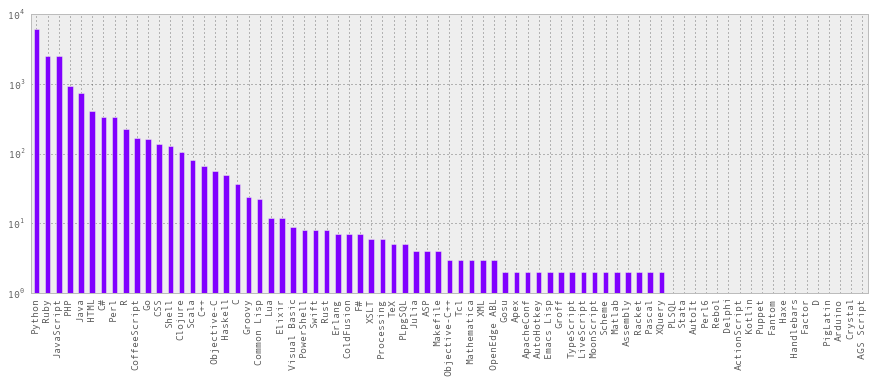

In [318]:
df.language.value_counts().plot(kind='bar', logy='True', colormap = 'rainbow')

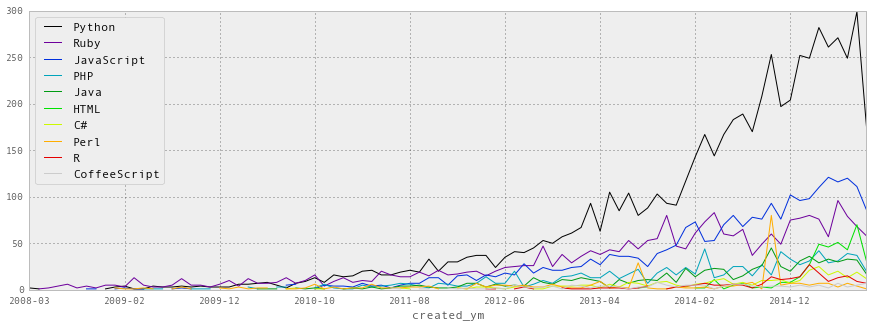

In [317]:
df.groupby(by=['created_ym'])['language'].value_counts().unstack(level=0).T[['Python','Ruby',
                                                                             'JavaScript','PHP',
                                                                             'Java','HTML','C#','Perl',
                                                                              'R','CoffeeScript']].plot(kind='line',
                                                                                         colormap='spectral')


Ruby vs Python until 2011-08, Ruby > Javascript until late 2013. Ruby is the only language without cuts.

In [345]:
df.groupby(by='language')[['stargazers_count',
                           'size','forks_count',
                           'open_issues_count','score_round']].mean().T[['Python','JavaScript', 'Ruby', 
                                                                         'PHP','R', 'Java']]

language,Python,JavaScript,Ruby,PHP,R,Java
stargazers_count,3.980076,6.799114,3.255896,5.064378,3.493333,0.904826
size,1943.196937,2076.908213,971.194182,1622.687768,11501.022222,5336.528150
forks_count,1.285526,0.975845,0.571541,1.019313,1.302222,0.328418
open_issues_count,0.318788,0.478663,0.316431,0.226395,0.448889,0.234584
score_round,2.181307,2.357927,2.226333,2.259828,2.221867,2.097011


##Section 4: Tokenizers & Dendograms

In [65]:
readme_df = pd.read_json('readmes.txt')
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram, linkage

An interesting trait of the data is that a vectorizer with min_df of 0.5returns an empty dictionary. Lower thresholds also return very small lists. This means that there very few common terms in the corpus. 

I'll use a first vectorizer to find stop words. 

In [19]:
vectorizer_sp=TfidfVectorizer(stop_words='english', use_idf=True, token_pattern=r'(?u)\b[a-z][a-z]+\b', min_df=0.02)
document_term_matrix_sp=vectorizer_sp.fit_transform(readme_df[(readme_df['language'] == 'Python') & (readme_df['readme'].notnull())]['readme'])
vocab_sp = vectorizer_sp.get_feature_names()
for i in vocab_sp:
    print i,

able access account activate add added additional address allows analysis api app application apt arguments author automatically available based basic beautiful beautifulsoup best better bin browser build built called case cd change changes check class clone code collection com command comments config configuration contain containing contains content copy copyright course crawl crawler create created csv current currently data database date day db default dependencies description details dev development different directory django docs documentation does doesn don download downloaded downloading downloads easily easy edit email en end enter environment error example examples execute export extract features feed feel fields file files folder follow following form format framework free function functions future general generate getting git github given good google grab help home html http https id image images import include included includes including index info information input install

In [20]:
vocab_sp_rev = []
for i in vocab_sp:
    if i != 'reddit' and i !=  'tweeter' and i != 'github':
        vocab_sp_rev.append(i)
        

In [61]:
import nltk
from nltk.corpus import stopwords
all_sw = stopwords.words('english')+vocab_sp_rev + more_stops
stop_str = "wanted learn learning plano world official mechanize argument years tags tag comment wrote old term apps como sources archive place pandas records grasa abdomen incinerador according across action actual actually adding addresses admin age agent allow along already always amount analyze another answer answers anything apache apis appear appears append appropriate around array aspx associated attempt attribute attributes authentication authors auto average avoid back background bad bajar bank bar barriga base bash basically basis big bit box br branch brand break brew budget bug bugs building bunch bus business ca cache caching calendar call calls campaign candidate card cards cases catalog categories category celery certain cfg changed character characters checking checks chicago child choice choose chrome city classes clean cleaning cli click client close co codes collect collected collects come comes commands common complete completed computer con conditions conf configure connect connection console contained contents context control convert cookie cookies copies correct correctly corresponding could count couple crawled crawling crawls creates creating creation credentials cron crontab crummy css csstarget curl dataset datasets dates datetime datos days dc dd de deal debug decided def defaults define defined definition del delay delete depending deploy der design designed desired detail detailed determine developed developer di dict dictionaries dictionary die dir directly dirty disclaimer display distribute distributed div doc docker document documents dom domain domains done downloader due dump dumps duplicate duplicates easier either el element elements else empty enabled engine english enjoy enough ensure entire entries entry env errors es etc even event events eventually every everything ex exactly excel except exchange execution exist existing exists exit express extension external extra extracted extracting extracts false far fast faster feature fetch fetcher fetching field figure filename fill filter final finally finding finds fine finished firefox fix flag flask follows foo fork formats formatted formatting frequency front full fun functionality gather generated generates gets give gives global glossary gnu go goal goes going graph great group groups gui guide handle handling hard head header headers high hit host hosted hour hours house however hr href idea ids il imdb imgur implement implementation implemented implied important improve inc incident individual ini initial initialize insert inside instance int integer intended interactive interest interested interesting internet intro introduction io ip ipython item javascript join js keep keys keyword keywords kind known la label language large last layout least left length less let lets li liability liable lib likely limit limited lines linux listed lists loaded loading localhost locally located locations logging logic login logs long looking looks los mac machine made making manage manually many master matches matching max maximum maybe means meant members memory menu merge methods might mine minimum minute minutes missing mkdir mkvirtualenv mlb mm mode model models modified moment mongo mongodb monitor month mostly move much multi must mysql navigate necessary network never next nice night node nodes none notebook nothing notice null numbers objects obtain often ones online original os others otherwise overview para parameter parameters params parsed parses part parts party pass passed past paste pattern pdf pdfs per perform performance period permission phantomjs php pickle pipeline pipelines plain platform plugin popular populate por port position posted postgres postgresql pprint pre prediction prerequisites present press pretty previous primary prints problem problems processed processing programming programs progress prompt proper properly property proxies proxy pulls purposes push put pyllage pypi pyquery quality que quemar queries question queue quickly quotes random range rank rankings rate rather raw re reading readme readthedocs ready real reason rebajar received recent recommend recommended refer reference regex register regular release released releases relevant remove rename replace report reporting reports require research resource resources response rest resulting retrieve retrieved returned row rows ruby saves saving schema scrap scrapper scrapyd screen se searches searching seconds seems selector selectors self sell sends sent sentence separate separated serve servers session sets setting several shall share shell short show shows similar since size sleep something sometimes soon sort span special specifically speed spiders split spreadsheet sqlalchemy ssh standard starting statement static stdout step steps still stock stop storing strings structured stuff style sub subject submit summary supported supports system tab tables take taken target task tasks tell template templates testing thanks thing think third though thread threads three timestamp tmp together token tor total track tracker tree tried tries trying turn tutorial types ubuntu ul un una und unicode unique unit unix updates upload upon urllib us usr usually utf utility valid var varchar variable variables venv verbose versions via view virtual virtualenvwrapper vs wait warning webpage webscraper webscraping welcome well wget whatever whether whole window within without word words wrapper xpath yet yield zip"
more_stops= stop_str.split()
all_sw = stopwords.words('english')+vocab_sp_rev + more_stops

In [60]:
#I've ran the vectorizer several times and picked these words manually
stop_str = "wanted learn learning plano world official mechanize argument years tags tag comment wrote old term apps como sources archive place pandas records grasa abdomen incinerador according across action actual actually adding addresses admin age agent allow along already always amount analyze another answer answers anything apache apis appear appears append appropriate around array aspx associated attempt attribute attributes authentication authors auto average avoid back background bad bajar bank bar barriga base bash basically basis big bit box br branch brand break brew budget bug bugs building bunch bus business ca cache caching calendar call calls campaign candidate card cards cases catalog categories category celery certain cfg changed character characters checking checks chicago child choice choose chrome city classes clean cleaning cli click client close co codes collect collected collects come comes commands common complete completed computer con conditions conf configure connect connection console contained contents context control convert cookie cookies copies correct correctly corresponding could count couple crawled crawling crawls creates creating creation credentials cron crontab crummy css csstarget curl dataset datasets dates datetime datos days dc dd de deal debug decided def defaults define defined definition del delay delete depending deploy der design designed desired detail detailed determine developed developer di dict dictionaries dictionary die dir directly dirty disclaimer display distribute distributed div doc docker document documents dom domain domains done downloader due dump dumps duplicate duplicates easier either el element elements else empty enabled engine english enjoy enough ensure entire entries entry env errors es etc even event events eventually every everything ex exactly excel except exchange execution exist existing exists exit express extension external extra extracted extracting extracts false far fast faster feature fetch fetcher fetching field figure filename fill filter final finally finding finds fine finished firefox fix flag flask follows foo fork formats formatted formatting frequency front full fun functionality gather generated generates gets give gives global glossary gnu go goal goes going graph great group groups gui guide handle handling hard head header headers high hit host hosted hour hours house however hr href idea ids il imdb imgur implement implementation implemented implied important improve inc incident individual ini initial initialize insert inside instance int integer intended interactive interest interested interesting internet intro introduction io ip ipython item javascript join js keep keys keyword keywords kind known la label language large last layout least left length less let lets li liability liable lib likely limit limited lines linux listed lists loaded loading localhost locally located locations logging logic login logs long looking looks los mac machine made making manage manually many master matches matching max maximum maybe means meant members memory menu merge methods might mine minimum minute minutes missing mkdir mkvirtualenv mlb mm mode model models modified moment mongo mongodb monitor month mostly move much multi must mysql navigate necessary network never next nice night node nodes none notebook nothing notice null numbers objects obtain often ones online original os others otherwise overview para parameter parameters params parsed parses part parts party pass passed past paste pattern pdf pdfs per perform performance period permission phantomjs php pickle pipeline pipelines plain platform plugin popular populate por port position posted postgres postgresql pprint pre prediction prerequisites present press pretty previous primary prints problem problems processed processing programming programs progress prompt proper properly property proxies proxy pulls purposes push put pyllage pypi pyquery quality que quemar queries question queue quickly quotes random range rank rankings rate rather raw re reading readme readthedocs ready real reason rebajar received recent recommend recommended refer reference regex register regular release released releases relevant remove rename replace report reporting reports require research resource resources response rest resulting retrieve retrieved returned row rows ruby saves saving schema scrap scrapper scrapyd screen se searches searching seconds seems selector selectors self sell sends sent sentence separate separated serve servers session sets setting several shall share shell short show shows similar since size sleep something sometimes soon sort span special specifically speed spiders split spreadsheet sqlalchemy ssh standard starting statement static stdout step steps still stock stop storing strings structured stuff style sub subject submit summary supported supports system tab tables take taken target task tasks tell template templates testing thanks thing think third though thread threads three timestamp tmp together token tor total track tracker tree tried tries trying turn tutorial types ubuntu ul un una und unicode unique unit unix updates upload upon urllib us usr usually utf utility valid var varchar variable variables venv verbose versions via view virtual virtualenvwrapper vs wait warning webpage webscraper webscraping welcome well wget whatever whether whole window within without word words wrapper xpath yet yield zip"
more_stops= stop_str.split()
all_sw = stopwords.words('english')+vocab_sp_rev + more_stops

In [63]:
vectorizer=TfidfVectorizer(stop_words=all_sw, use_idf=True, token_pattern=r'(?u)\b[a-z][a-z]+\b', max_features=100, max_df=0.05, ngram_range=(1, 2))
document_term_matrix=vectorizer.fit_transform(readme_df[(readme_df['language'] == 'Python') & (readme_df['readme'].notnull())]['readme'])
vocab = vectorizer.get_feature_names()
for i in vocab:
    print i,

amazon article articles artist blog board bot column columns companies company contact country courses craigslist custom daily department edu election emails facebook forum game games get get get see gmail gov heroku history instagram jobs licensed linkedin listing listings live mail manager map media messages metadata movie movies name name nba nginx person play player players prices product products profile published rating reddit redis review reviews rights rss schedule school score scraperwiki season series services social songs stack statistics stats subreddit team titles top topic tv tweet tweets uk university video videos votes warranty week wiki wikipedia wish writes writing yahoo yelp youtube


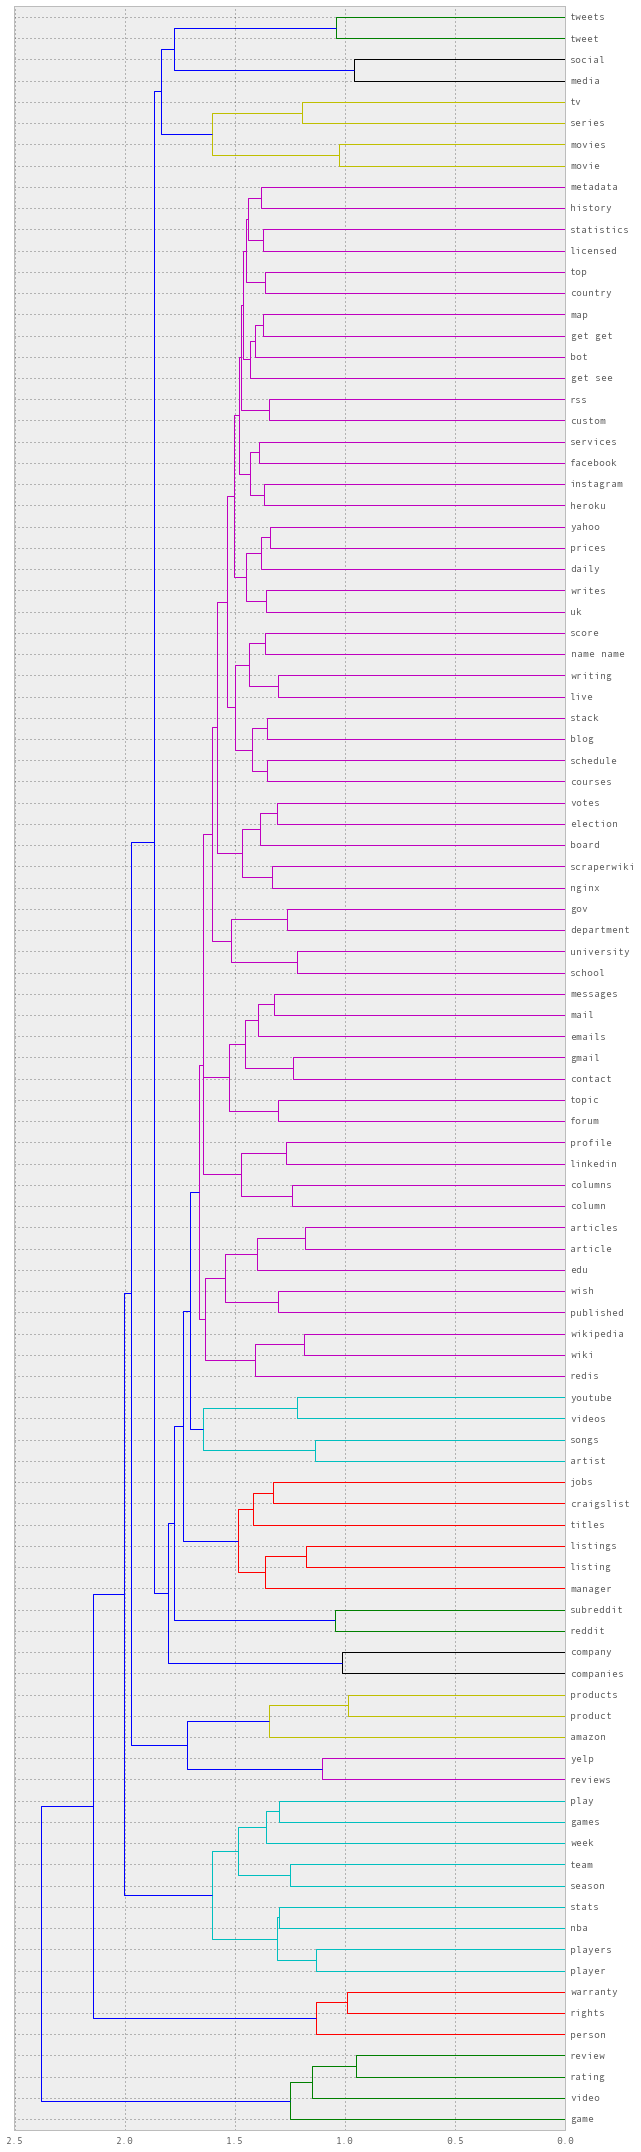

In [64]:
dtm_trans=document_term_matrix.T
dist=1-cosine_similarity(dtm_trans)
linkage_matrix=ward(dist)
f=plt.figure(figsize=(9,30))
R=dendrogram(linkage_matrix, orientation="right", labels=vocab)
plt.tight_layout()

In [ ]:
#heroku, nginx, redis
#try 75
#look at  stemming

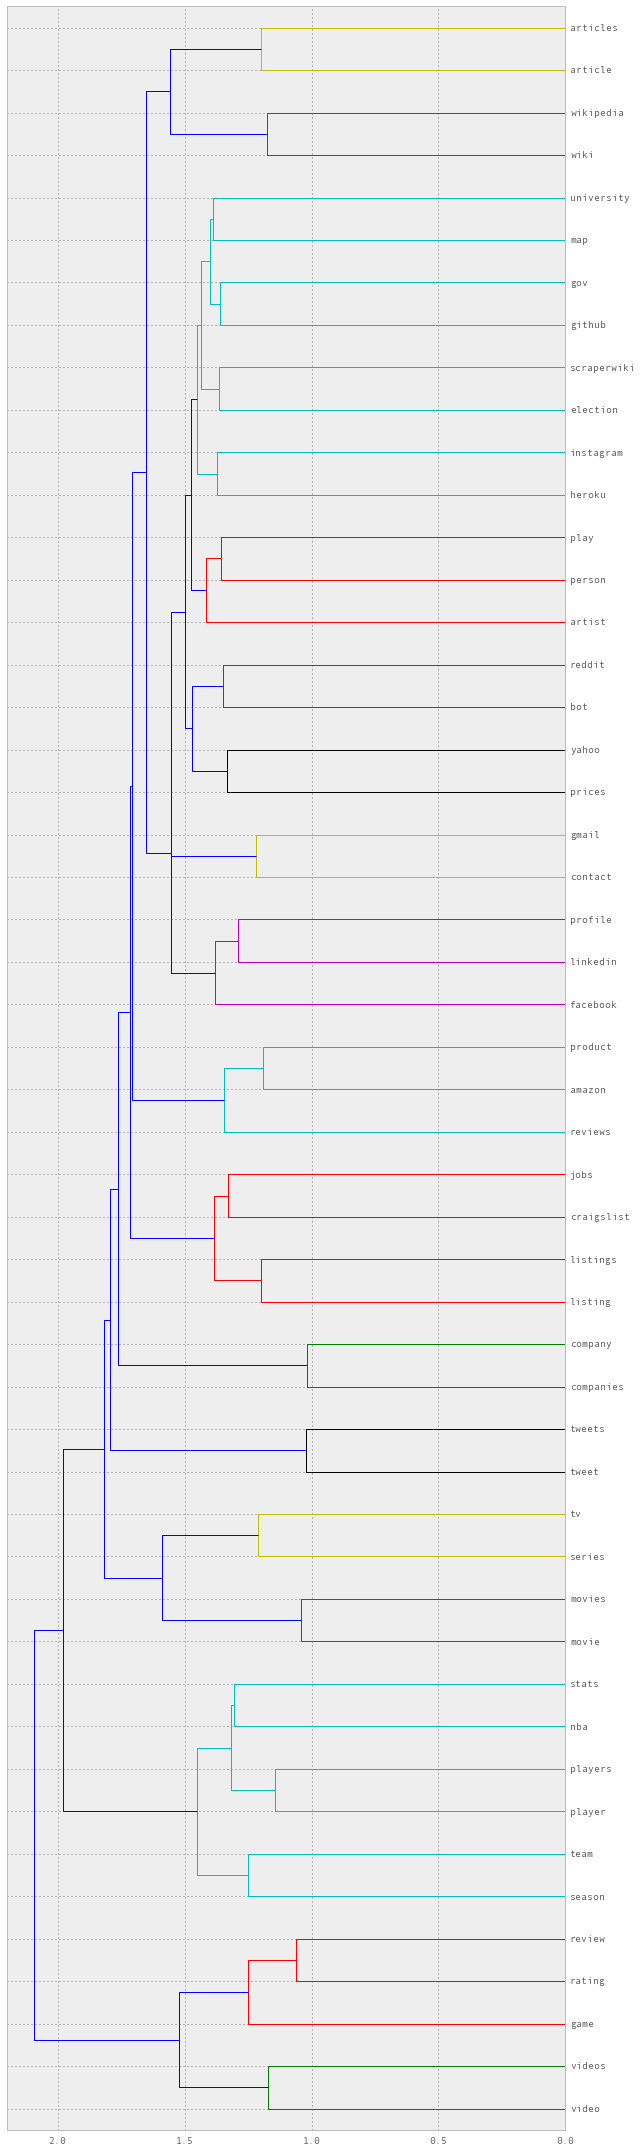

In [85]:
stop_str = "please found find two first would one may messages forum png rss custom titles hn metadata blog edu demo services meta jewelry ejercicios statistics licensed daily week schedule phone manager emails history core board uk top country get see writes name writing live stack nginx topic column columns wish published social media wanted learn learning plano world official mechanize argument years tags tag comment wrote old term apps como sources archive place pandas records grasa abdomen incinerador according across action actual actually adding addresses admin age agent allow along already always amount analyze another answer answers anything apache apis appear appears append appropriate around array aspx associated attempt attribute attributes authentication authors auto average avoid back background bad bajar bank bar barriga base bash basically basis big bit box br branch brand break brew budget bug bugs building bunch bus business ca cache caching calendar call calls campaign candidate card cards cases catalog categories category celery certain cfg changed character characters checking checks chicago child choice choose chrome city classes clean cleaning cli click client close co codes collect collected collects come comes commands common complete completed computer con conditions conf configure connect connection console contained contents context control convert cookie cookies copies correct correctly corresponding could count couple crawled crawling crawls creates creating creation credentials cron crontab crummy css csstarget curl dataset datasets dates datetime datos days dc dd de deal debug decided def defaults define defined definition del delay delete depending deploy der design designed desired detail detailed determine developed developer di dict dictionaries dictionary die dir directly dirty disclaimer display distribute distributed div doc docker document documents dom domain domains done downloader due dump dumps duplicate duplicates easier either el element elements else empty enabled engine english enjoy enough ensure entire entries entry env errors es etc even event events eventually every everything ex exactly excel except exchange execution exist existing exists exit express extension external extra extracted extracting extracts false far fast faster feature fetch fetcher fetching field figure filename fill filter final finally finding finds fine finished firefox fix flag flask follows foo fork formats formatted formatting frequency front full fun functionality gather generated generates gets give gives global glossary gnu go goal goes going graph great group groups gui guide handle handling hard head header headers high hit host hosted hour hours house however hr href idea ids il imdb imgur implement implementation implemented implied important improve inc incident individual ini initial initialize insert inside instance int integer intended interactive interest interested interesting internet intro introduction io ip ipython item javascript join js keep keys keyword keywords kind known la label language large last layout least left length less let lets li liability liable lib likely limit limited lines linux listed lists loaded loading localhost locally located locations logging logic login logs long looking looks los mac machine made making manage manually many master matches matching max maximum maybe means meant members memory menu merge methods might mine minimum minute minutes missing mkdir mkvirtualenv mlb mm mode model models modified moment mongo mongodb monitor month mostly move much multi must mysql navigate necessary network never next nice night node nodes none notebook nothing notice null numbers objects obtain often ones online original os others otherwise overview para parameter parameters params parsed parses part parts party pass passed past paste pattern pdf pdfs per perform performance period permission phantomjs php pickle pipeline pipelines plain platform plugin popular populate por port position posted postgres postgresql pprint pre prediction prerequisites present press pretty previous primary prints problem problems processed processing programming programs progress prompt proper properly property proxies proxy pulls purposes push put pyllage pypi pyquery quality que quemar queries question queue quickly quotes random range rank rankings rate rather raw re reading readme readthedocs ready real reason rebajar received recent recommend recommended refer reference regex register regular release released releases relevant remove rename replace report reporting reports require research resource resources response rest resulting retrieve retrieved returned row rows ruby saves saving schema scrap scrapper scrapyd screen se searches searching seconds seems selector selectors self sell sends sent sentence separate separated serve servers session sets setting several shall share shell short show shows similar since size sleep something sometimes soon sort span special specifically speed spiders split spreadsheet sqlalchemy ssh standard starting statement static stdout step steps still stock stop storing strings structured stuff style sub subject submit summary supported supports system tab tables take taken target task tasks tell template templates testing thanks thing think third though thread threads three timestamp tmp together token tor total track tracker tree tried tries trying turn tutorial types ubuntu ul un una und unicode unique unit unix updates upload upon urllib us usr usually utf utility valid var varchar variable variables venv verbose versions via view virtual virtualenvwrapper vs wait warning webpage webscraper webscraping welcome well wget whatever whether whole window within without word words wrapper xpath yet yield zip"
more_stops= stop_str.split()
all_sw = stopwords.words('english')+vocab_sp_rev + more_stops
vectorizer=TfidfVectorizer(stop_words=all_sw, use_idf=True, token_pattern=r'(?u)\b[a-z][a-z]+\b', max_features=50, max_df=0.1, ngram_range = (1,2))
document_term_matrix=vectorizer.fit_transform(readme_df[(readme_df['language'] == 'Python') & (readme_df['readme'].notnull())]['readme'])
vocab = vectorizer.get_feature_names()
dtm_trans=document_term_matrix.T
dist=1-cosine_similarity(dtm_trans)
linkage_matrix=ward(dist)
f=plt.figure(figsize=(9,30))
R=dendrogram(linkage_matrix, orientation="right", labels=vocab)
plt.tight_layout()

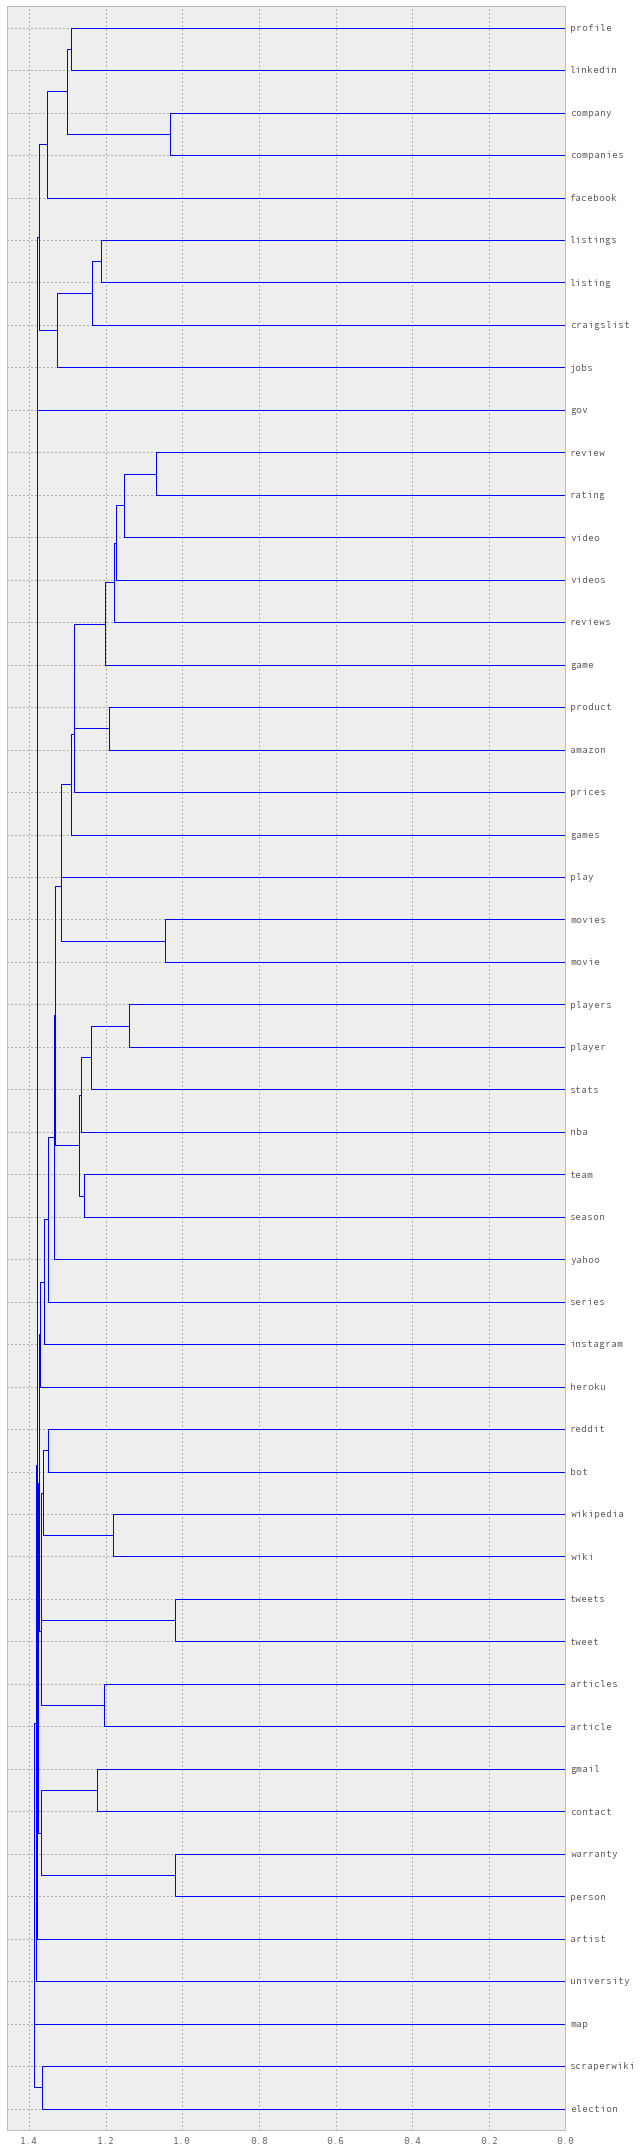

In [78]:
# As an alternative to Ward I tried all the algorithms available in linkage, 
#none of them improved the first set of clusters
#the one displayed below made most sense
linkage_matrix2=linkage(dist, method='single')
f=plt.figure(figsize=(9,30))
R=dendrogram(linkage_matrix2, orientation="right", labels=vocab)
plt.tight_layout()

##Section 5: Repo clusters by README topics

See 'topics_analysis.ipynb' 